In [11]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib



^C


In [16]:
import mediapipe as mp


In [2]:
import cv2 
import numpy as np
import os
import tensorflow
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:

mp_holistic = mp.solutions.holistic # Detection model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB the reason is that mediapipe accepts RGB images
    image.flags.writeable = False                  # Image is no longer writeable so we can process it more efficiently
    results = model.process(image)                 # Make prediction so we can draw it on the image
    image.flags.writeable = True                   # Image is now writeable so we can display it because we have processed it, so we make it true to display it
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR so we can display it
    return image, results

In [6]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [6]:
import mediapipe as mp
print(hasattr(mp.solutions.holistic, 'FACE_CONNECTIONS'))  # Should return True
print(hasattr(mp.solutions.holistic, 'POSE_CONNECTIONS'))  # Should return True
print(hasattr(mp.solutions.holistic, 'HAND_CONNECTIONS'))  # Should return True


False
True
True


In [7]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read() # Capture frame
        if not ret:
            break

        # Make detections and draw landmarks
        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)

        # Display the resulting frame with landmarks
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'): # Exit on 'q' key
            break

# Release the capture
cap.release()
cv2.destroyAllWindows()

c:\Users\melis\Documents\jupyter\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
draw_landmarks(frame, results) #draw landmarks on the image


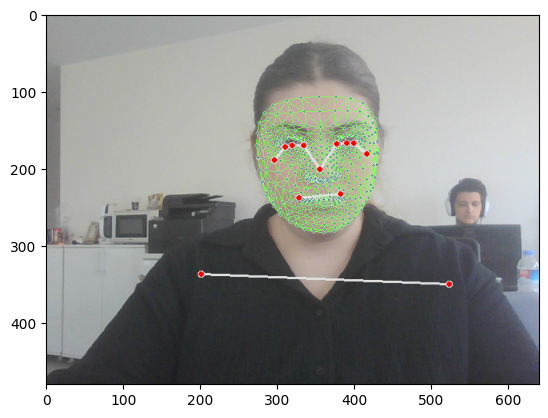

In [9]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #show image

In [10]:
pose_landmarks =np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face_landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh_landmarks = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh_landmarks = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_landmark(results):
    pose_landmarks =np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face_landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh_landmarks = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh_landmarks = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_landmarks, face_landmarks, lh_landmarks, rh_landmarks])

In [12]:
DATA_PATH = os.path.join('MP_Data') # Create a folder for the data, path for exported data
actions = np.array(['hello', 'thanks', 'iloveyou']) # specify the actions that we need to detect
no_sequences = 30 # number of sequences
sequence_length = 30 # sequence length, videos length

In [14]:
for action in actions:# loop over the actions
    for sequence in range(no_sequences):# loop over the sequences
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))# create a folder for each sequence
        except:
            pass

In [91]:
# Initialize the webcam feed
cap = cv2.VideoCapture(0)

# Optionally reduce the resolution to reduce processing load
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Set up Mediapipe's holistic model with desired confidence levels
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through each action
    for action in actions:
        
        # Loop through the number of sequences to collect for each action
        for sequence in range(no_sequences):
            
            # Indicate the start of the sequence collection
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()  # Capture a frame from the webcam
                
                if not ret:  # If the frame capture fails, exit the loop
                    break
                
                # Make detections and draw landmarks using Mediapipe
                image, results = mediapipe_detection(frame, holistic)
                draw_landmarks(image, results)
                
                if frame_num == 0:  # Check if this is the first frame in the sequence
                    # Display a message indicating the start of data collection
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Sequence Number {}'.format(action, sequence),
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)  # Wait for 1 second before continuing
                else:  # For all other frames
                    # Display the current frame with action and sequence information
                    cv2.putText(image, 'Collecting frames for {} Sequence Number {}'.format(action, sequence),
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                keypoint = extract_landmark(results)  # Extract the landmarks
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoint)
                
                # Show the image only once every 5 frames to reduce processing load
                if frame_num % 5 == 0:
                    cv2.imshow('OpenCV Feed', image)
                
                # Check if the user wants to quit (by pressing 'q')
                if cv2.waitKey(20) & 0xFF == ord('q'):
                    break

            # Optional: Add a small delay between sequences to manage load
            cv2.waitKey(500)  # Wait for 0.5 second before starting the next sequence
    
    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


preprocess the data

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [17]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [18]:
x = np.array(sequences)
x.shape

(90, 30, 1662)

In [19]:
y = to_categorical(labels).astype(int) #one hot encoding
y.shape

(90, 3)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


build and train lstm neural network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [45]:
# Initialize the Sequential model
# - The Sequential model allows you to build a layer-by-layer neural network. It's the simplest way to build a model in Keras.
model = Sequential()

# First LSTM layer
# - 64 units (neurons) in the layer: The number of units defines the output dimensionality of the LSTM layer. 
#   More units can capture more complex features, but it also increases computational cost.
# - return_sequences=True: By setting this to True, the LSTM layer returns the entire sequence of outputs for each input sequence. 
#   This is necessary when stacking multiple LSTM layers, as each LSTM needs the full sequence to learn temporal dependencies.
# - activation='relu': The ReLU activation function introduces non-linearity, which helps the model learn complex patterns.
# - input_shape=(30, 1662): Specifies the shape of the input data. 30 is the sequence length (number of time steps), 
#   and 1662 is the number of features per time step. This input shape is derived from the data you're working with, 
#   where x.shape is (90, 30, 1662), and 90 is the number of sequences (not included in input_shape).
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))

# Second LSTM layer
# - 128 units in the layer: This layer has more units than the previous one, allowing it to capture more detailed and complex patterns.
# - return_sequences=True: Again, return_sequences=True is used because we're stacking another LSTM layer after this one. 
#   This ensures that the next LSTM layer receives the full sequence of data.
# - activation='relu': Continues using the ReLU activation function to maintain non-linearity and improve the model's ability to learn complex patterns.
model.add(LSTM(128, return_sequences=True, activation='relu'))

# Third LSTM layer
# - 64 units in the layer: This layer reduces the dimensionality, which can help the model generalize better by focusing on the most important features.
# - return_sequences=False: This is the last LSTM layer in the stack, so return_sequences=False is used to only return the last output of the sequence, 
#   which will be passed to the next (Dense) layer.
# - activation='relu': ReLU is used again to ensure non-linear learning continues through this layer.
model.add(LSTM(64, return_sequences=False, activation='relu'))

# First Dense layer
# - 64 units in the layer: The Dense layer is fully connected, meaning each neuron receives input from all neurons in the previous layer.
#   This helps in learning higher-level representations of the data after it has been processed by the LSTM layers.
# - activation='relu': ReLU is used to introduce non-linearity, which is crucial for learning complex relationships in the data.
model.add(Dense(64, activation='relu'))

# Second Dense layer
# - 32 units in the layer: Further reducing the number of neurons can help the model focus on the most relevant features, potentially reducing overfitting.
# - activation='relu': Continuation of non-linear activation to maintain the model's ability to learn complex features.
model.add(Dense(32, activation='relu'))

# Output layer
# - actions.shape[0] units: The number of units in this layer corresponds to the number of possible output classes (actions).
#   This is dynamically set based on the number of actions you want to classify.
# - activation='softmax': The softmax activation function is used for multi-class classification. 
#   It converts the output scores into probabilities, with all probabilities summing up to 1. 
#   The model will predict the class with the highest probability.
model.add(Dense(actions.shape[0], activation='softmax'))

# Summary of why this architecture is used:
# - LSTM layers are used because the problem involves sequential data, where the order of the data points matters. 
#   LSTMs are well-suited for capturing temporal dependencies in sequences, such as time series or video data.
# - The stacking of LSTM layers with return_sequences=True allows the model to learn more complex patterns by processing the full sequence multiple times.
# - Dense layers follow the LSTM layers to learn more abstract and higher-level representations of the data.
# - The output layer uses softmax activation to handle multi-class classification, outputting probabilities for each action class.

c:\Users\melis\Documents\jupyter\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #loss function to multi-class classification

In [23]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Then attempt to train again


x_train shape: (81, 30, 1662)
y_train shape: (81, 3)


In [42]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]) #train the model #epochs is the number of iterations if i increase the number of epochs the model will be more accurate

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - categorical_accuracy: 0.3324 - loss: 1.4151
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - categorical_accuracy: 0.4241 - loss: 1.2016
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3990 - loss: 2.5863
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.2003 - loss: 15.1889
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 0.3694 - loss: 29.1551
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.2491 - loss: 6.0404
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - categorical_accuracy: 0.3034 - loss: 12.2605
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.3021 - loss: 5.5117
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.3174 - loss: 11.5116
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.3535 - loss: 15.2556
Epoch 11/2000
3/3 ━━━

KeyboardInterrupt: 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
res = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


In [28]:
actions[np.argmax(res[2])]

'thanks'

In [27]:
actions[np.argmax(y_test[1])]

'hello'

In [29]:
model.save('action.h5')

In [43]:
del model

In [46]:
model.load_weights('action.h5')

Confusion Matrix

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [2, 3]],

       [[8, 0],
        [0, 1]],

       [[4, 2],
        [1, 2]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.6666666666666666

# test in real life

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [56]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [59]:
sequence.reverse()
sequence.append('def')
sequence.reverse()

sequence[-30:]

['def',
 'def',
 array([ 0.58965921,  0.4395746 , -1.6649313 , ...,  0.        ,
         0.        ,  0.        ])]

SyntaxError: invalid syntax (3771541321.py, line 1)

In [ ]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib



^C


In [ ]:
import mediapipe as mp


In [ ]:
import cv2 
import numpy as np
import os
import tensorflow
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [ ]:

mp_holistic = mp.solutions.holistic # Detection model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB the reason is that mediapipe accepts RGB images
    image.flags.writeable = False                  # Image is no longer writeable so we can process it more efficiently
    results = model.process(image)                 # Make prediction so we can draw it on the image
    image.flags.writeable = True                   # Image is now writeable so we can display it because we have processed it, so we make it true to display it
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR so we can display it
    return image, results

In [ ]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [ ]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [ ]:
import mediapipe as mp
print(hasattr(mp.solutions.holistic, 'FACE_CONNECTIONS'))  # Should return True
print(hasattr(mp.solutions.holistic, 'POSE_CONNECTIONS'))  # Should return True
print(hasattr(mp.solutions.holistic, 'HAND_CONNECTIONS'))  # Should return True


False
True
True


In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read() # Capture frame
        if not ret:
            break

        # Make detections and draw landmarks
        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)

        # Display the resulting frame with landmarks
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'): # Exit on 'q' key
            break

# Release the capture
cap.release()
cv2.destroyAllWindows()

c:\Users\melis\Documents\jupyter\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
draw_landmarks(frame, results) #draw landmarks on the image


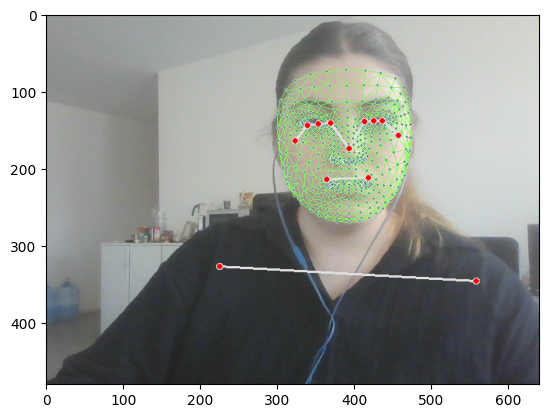

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #show image

In [ ]:
pose_landmarks =np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face_landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh_landmarks = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh_landmarks = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_landmark(results):
    pose_landmarks =np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face_landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh_landmarks = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh_landmarks = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_landmarks, face_landmarks, lh_landmarks, rh_landmarks])

In [ ]:
DATA_PATH = os.path.join('MP_Data') # Create a folder for the data, path for exported data
actions = np.array(['hello', 'thanks', 'iloveyou']) # specify the actions that we need to detect
no_sequences = 30 # number of sequences
sequence_length = 30 # sequence length, videos length

In [ ]:
for action in actions:# loop over the actions
    for sequence in range(no_sequences):# loop over the sequences
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))# create a folder for each sequence
        except:
            pass

In [ ]:
# Initialize the webcam feed
cap = cv2.VideoCapture(0)

# Optionally reduce the resolution to reduce processing load
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Set up Mediapipe's holistic model with desired confidence levels
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through each action
    for action in actions:
        
        # Loop through the number of sequences to collect for each action
        for sequence in range(no_sequences):
            
            # Indicate the start of the sequence collection
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()  # Capture a frame from the webcam
                
                if not ret:  # If the frame capture fails, exit the loop
                    break
                
                # Make detections and draw landmarks using Mediapipe
                image, results = mediapipe_detection(frame, holistic)
                draw_landmarks(image, results)
                
                if frame_num == 0:  # Check if this is the first frame in the sequence
                    # Display a message indicating the start of data collection
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Sequence Number {}'.format(action, sequence),
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)  # Wait for 1 second before continuing
                else:  # For all other frames
                    # Display the current frame with action and sequence information
                    cv2.putText(image, 'Collecting frames for {} Sequence Number {}'.format(action, sequence),
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                keypoint = extract_landmark(results)  # Extract the landmarks
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoint)
                
                # Show the image only once every 5 frames to reduce processing load
                if frame_num % 5 == 0:
                    cv2.imshow('OpenCV Feed', image)
                
                # Check if the user wants to quit (by pressing 'q')
                if cv2.waitKey(20) & 0xFF == ord('q'):
                    break

            # Optional: Add a small delay between sequences to manage load
            cv2.waitKey(500)  # Wait for 0.5 second before starting the next sequence
    
    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


preprocess the data

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
x = np.array(sequences)
x.shape

(90, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int) #one hot encoding
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


build and train lstm neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# Initialize the Sequential model
# - The Sequential model allows you to build a layer-by-layer neural network. It's the simplest way to build a model in Keras.
model = Sequential()

# First LSTM layer
# - 64 units (neurons) in the layer: The number of units defines the output dimensionality of the LSTM layer. 
#   More units can capture more complex features, but it also increases computational cost.
# - return_sequences=True: By setting this to True, the LSTM layer returns the entire sequence of outputs for each input sequence. 
#   This is necessary when stacking multiple LSTM layers, as each LSTM needs the full sequence to learn temporal dependencies.
# - activation='relu': The ReLU activation function introduces non-linearity, which helps the model learn complex patterns.
# - input_shape=(30, 1662): Specifies the shape of the input data. 30 is the sequence length (number of time steps), 
#   and 1662 is the number of features per time step. This input shape is derived from the data you're working with, 
#   where x.shape is (90, 30, 1662), and 90 is the number of sequences (not included in input_shape).
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))

# Second LSTM layer
# - 128 units in the layer: This layer has more units than the previous one, allowing it to capture more detailed and complex patterns.
# - return_sequences=True: Again, return_sequences=True is used because we're stacking another LSTM layer after this one. 
#   This ensures that the next LSTM layer receives the full sequence of data.
# - activation='relu': Continues using the ReLU activation function to maintain non-linearity and improve the model's ability to learn complex patterns.
model.add(LSTM(128, return_sequences=True, activation='relu'))

# Third LSTM layer
# - 64 units in the layer: This layer reduces the dimensionality, which can help the model generalize better by focusing on the most important features.
# - return_sequences=False: This is the last LSTM layer in the stack, so return_sequences=False is used to only return the last output of the sequence, 
#   which will be passed to the next (Dense) layer.
# - activation='relu': ReLU is used again to ensure non-linear learning continues through this layer.
model.add(LSTM(64, return_sequences=False, activation='relu'))

# First Dense layer
# - 64 units in the layer: The Dense layer is fully connected, meaning each neuron receives input from all neurons in the previous layer.
#   This helps in learning higher-level representations of the data after it has been processed by the LSTM layers.
# - activation='relu': ReLU is used to introduce non-linearity, which is crucial for learning complex relationships in the data.
model.add(Dense(64, activation='relu'))

# Second Dense layer
# - 32 units in the layer: Further reducing the number of neurons can help the model focus on the most relevant features, potentially reducing overfitting.
# - activation='relu': Continuation of non-linear activation to maintain the model's ability to learn complex features.
model.add(Dense(32, activation='relu'))

# Output layer
# - actions.shape[0] units: The number of units in this layer corresponds to the number of possible output classes (actions).
#   This is dynamically set based on the number of actions you want to classify.
# - activation='softmax': The softmax activation function is used for multi-class classification. 
#   It converts the output scores into probabilities, with all probabilities summing up to 1. 
#   The model will predict the class with the highest probability.
model.add(Dense(actions.shape[0], activation='softmax'))

# Summary of why this architecture is used:
# - LSTM layers are used because the problem involves sequential data, where the order of the data points matters. 
#   LSTMs are well-suited for capturing temporal dependencies in sequences, such as time series or video data.
# - The stacking of LSTM layers with return_sequences=True allows the model to learn more complex patterns by processing the full sequence multiple times.
# - Dense layers follow the LSTM layers to learn more abstract and higher-level representations of the data.
# - The output layer uses softmax activation to handle multi-class classification, outputting probabilities for each action class.

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #loss function to multi-class classification

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Then attempt to train again


x_train shape: (81, 30, 1662)
y_train shape: (81, 3)


In [ ]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]) #train the model #epochs is the number of iterations if i increase the number of epochs the model will be more accurate

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - categorical_accuracy: 0.3073 - loss: 1.2251
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.2939 - loss: 1.4979
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.3739 - loss: 1.4356
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.4387 - loss: 3.6620
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - categorical_accuracy: 0.3620 - loss: 30.8199
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - categorical_accuracy: 0.3671 - loss: 37.0017
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - categorical_accuracy: 0.2820 - loss: 12.9615
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - categorical_accuracy: 0.3050 - loss: 12.7293
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.3128 - loss: 13.6039
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3262 - loss: 5.3620
Epoch 11/2000
3/

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [ ]:
res = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


In [ ]:
actions[np.argmax(res[1])]

'thanks'

In [ ]:
actions[np.argmax(y_test[1])]

'thanks'

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

Confusion Matrix

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [2, 0]],

       [[0, 6],
        [0, 3]],

       [[5, 0],
        [4, 0]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

0.3333333333333333

# test in real life

In [ ]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

In [66]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks,mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [69]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_landmark(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
plt.figure(figsize=(30, 30))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 3000x3000 with 0 Axes>

In [ ]:
print("res:", res)
print("prob:", prob)


res: [[9.4851865e-05 5.4146862e-03 9.9449050e-01]
 [2.9306266e-05 9.9872917e-01 1.2414795e-03]
 [1.0268643e-04 8.1034582e-03 9.9179381e-01]
 [9.8405796e-01 2.3760505e-03 1.3565967e-02]
 [4.5755976e-01 4.3849412e-02 4.9859089e-01]
 [4.6053468e-05 9.9923611e-01 7.1782299e-04]
 [3.2943903e-05 9.9974078e-01 2.2628966e-04]
 [2.3371475e-05 2.3907442e-03 9.9758577e-01]
 [8.3850637e-02 7.5627041e-01 1.5987898e-01]]


NameError: name 'prob' is not defined

In [127]:
plt.figure(figsize=(30, 30))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 3000x3000 with 0 Axes>

In [130]:
print("res:", res)
print("prob:", prob)


res: [[9.4851865e-05 5.4146862e-03 9.9449050e-01]
 [2.9306266e-05 9.9872917e-01 1.2414795e-03]
 [1.0268643e-04 8.1034582e-03 9.9179381e-01]
 [9.8405796e-01 2.3760505e-03 1.3565967e-02]
 [4.5755976e-01 4.3849412e-02 4.9859089e-01]
 [4.6053468e-05 9.9923611e-01 7.1782299e-04]
 [3.2943903e-05 9.9974078e-01 2.2628966e-04]
 [2.3371475e-05 2.3907442e-03 9.9758577e-01]
 [8.3850637e-02 7.5627041e-01 1.5987898e-01]]


NameError: name 'prob' is not defined